Here I explore the sklearn in-built dataset, the diabetes dataset (regression problem) using the decision tree algorithim and its tree pruning capabilities.

LOADING THE LIBRARIES

In [25]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.1.


In [5]:
pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 1.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [9]:
import sklearn

In [13]:
from sklearn import datasets
# Loading in the in-built diabetes data

In [19]:
import pandas as pd

In [70]:
import matplotlib.pyplot as plt


LOADING THE DATASET

In [16]:
dia= datasets.load_diabetes()

In [17]:
dia

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar l

Puting the features of the dataset into a dataframe

In [23]:
dframe = pd.DataFrame(dia.data, columns=dia.feature_names)
with pd.option_context('display.max_rows', 10, 'display.max_columns', None): 
    display(dframe)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [36]:
dia.data.size

4420

SPLITING TESTING AND TRAINING DATASET

Splitting training and tetsing dataset into 80% and 20% ratio

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dia.data , dia.target, test_size =0.2, random_state = 42)

In [39]:
x_train.size


3530

In [41]:
x_test.size

890

PRE-PROCESSING 

How much feature engineering is required by decision tree ?
- Normalziation/Scaling - No feature scaling (standardization and normalization) required in case of Decision Tree as it uses rule based approach instead of distance calculation.

- Outliers - Decision Tree is usually robust to outliers.

- One hot encoding - Not needed for this dataset

- Missing data - Decision Tree can automatically handle missing values.

Feature Enginering - I am not bothering with it here since the dataset has only 10 features but in general if you do it it will lead to a better score

MOVING ON BUILDING THE TREE AND VISUALZING IT 

In [110]:
from sklearn import tree
decison_tree = tree.DecisionTreeRegressor(random_state= 42)
decison_tree.fit(x_train,y_train)
prediction = decison_tree.predict(x_test)

In [81]:
decison_tree.get_depth()

19

In [82]:
decison_tree.get_n_leaves()

346

In [83]:
decison_tree.get_params(deep=True)

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

VISUALZING THE TREE

[Text(1712.5240424998472, 2650.05, 'X[2] <= 0.005\nmse = 6076.398\nsamples = 353\nvalue = 153.737'),
 Text(989.5441263312223, 2514.15, 'X[8] <= 0.006\nmse = 3612.73\nsamples = 209\nvalue = 118.043'),
 Text(531.281129731821, 2378.25, 'X[8] <= -0.043\nmse = 2378.339\nsamples = 152\nvalue = 100.559'),
 Text(246.79305219002626, 2242.35, 'X[4] <= -0.039\nmse = 1425.414\nsamples = 49\nvalue = 80.878'),
 Text(155.4387179539392, 2106.45, 'X[4] <= -0.046\nmse = 1663.902\nsamples = 28\nvalue = 94.75'),
 Text(78.17385815227351, 1970.55, 'X[9] <= -0.076\nmse = 1058.16\nsamples = 24\nvalue = 84.083'),
 Text(14.543973609725304, 1834.65, 'X[2] <= -0.057\nmse = 723.5\nsamples = 4\nvalue = 113.0'),
 Text(7.271986804862652, 1698.75, 'mse = 0.0\nsamples = 1\nvalue = 70.0'),
 Text(21.815960414587956, 1698.75, 'X[4] <= -0.074\nmse = 142.889\nsamples = 3\nvalue = 127.333'),
 Text(14.543973609725304, 1562.85, 'mse = 0.0\nsamples = 1\nvalue = 143.0'),
 Text(29.08794721945061, 1562.85, 'X[7] <= -0.054\nmse = 3

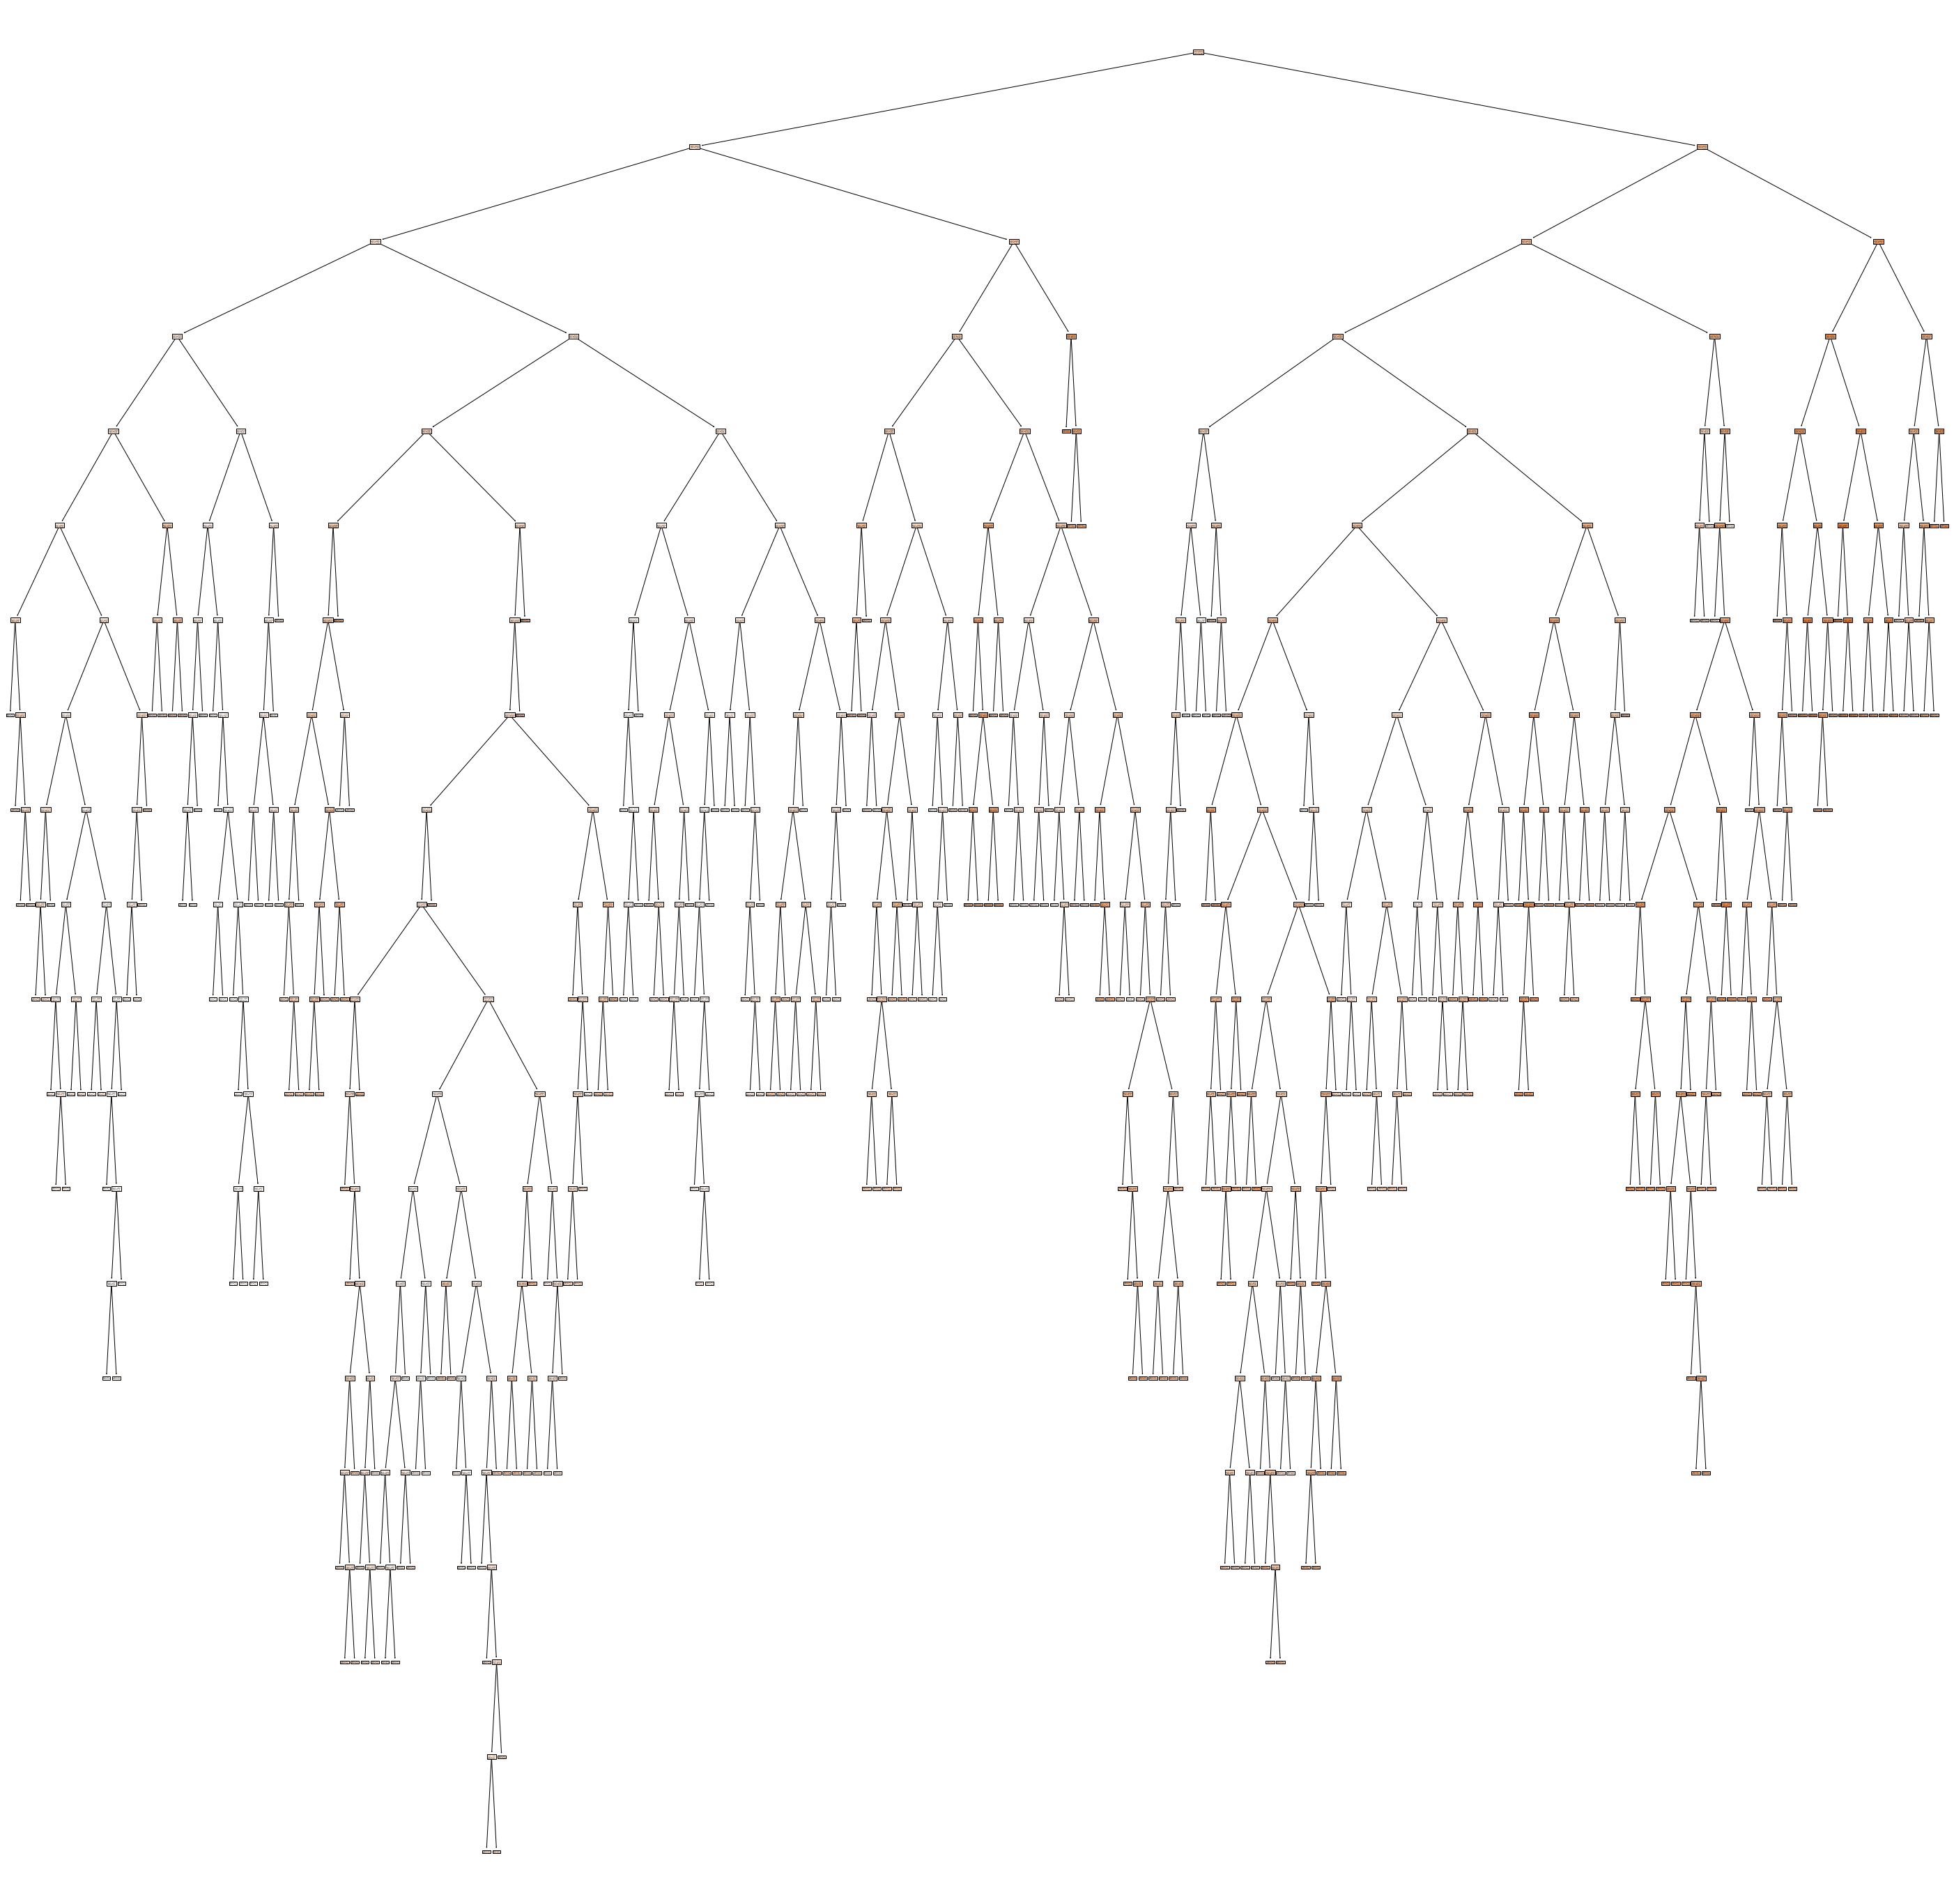

In [74]:
from sklearn import tree
plt.figure (figsize = (50,50))
tree.plot_tree(decison_tree, filled= True)

The tree is very wide and a depth of 19 and number of leaves equal to 346.

In [111]:

from sklearn.metrics import r2_score # r^2 is used 
r2_score_error = r2_score(y_test ,prediction)
print('Coefficient of determination is' , r2_score_error)

Coefficient of determination is 0.058738960879898494


Here we see a r^2 score of 0.06.

PERFORMING TREE PRUNING SINCE THE TREE ABOVE CAN BEEN BUILT TO THE MAXIMUM DEPTH. 

Decision tree generally tends to show a low bias and high vaiance, so we need to remove this overfitting issue.

METHOD -1

The DecisionTree has parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. We need to fine tune these paramters to prevent the tree from overfitting. We have done that here using Grid Search CV.

In [61]:
from sklearn.model_selection import GridSearchCV

In [76]:
# Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
params = {"max_depth": range(1, 11),
          
          "min_samples_leaf": range(1, 20)}

# Create the grid search object
grid = GridSearchCV(decison_tree, params, scoring="r2")

# Fit the grid search object to the data to compute the optimal model
grid = grid.fit(x_train, y_train)


In [77]:
prediction = grid.predict(x_test)

In [78]:
from sklearn.metrics import r2_score # r^2 is used 
r2_score_error = r2_score(y_test ,prediction)
print('Coefficient of determination is' , r2_score_error)

Coefficient of determination is 0.2703043740015454


It seems that all this tuning could only increase R^2 score from 0.06 to 0.27.

METHOD - 2

Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. 

Minimal cost complexity pruning recursively finds the node with the “weakest link”. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [87]:
path = decison_tree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities # generating the cost complexity pruning values and impurities for this dataset

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

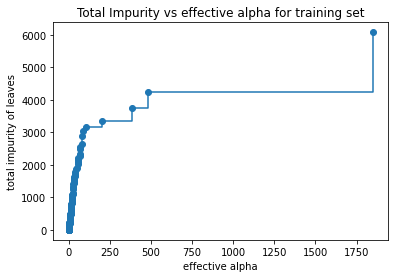

In [89]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:], impurities[:], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In the graph see we see as the effective alpha increases, more trees are pruned and the total impurity also increases.

In [93]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 1849.1052015393088


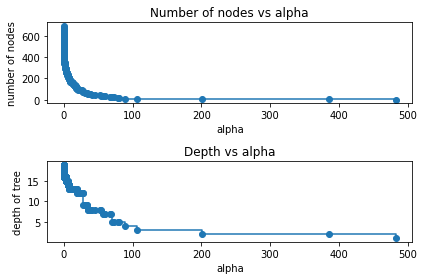

In [95]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

That means that prepruning we had 600+ nodes and 15 + tree depth.

Post pruning we have less than 5 depth, less than 20 nodes and alpha of close to 485

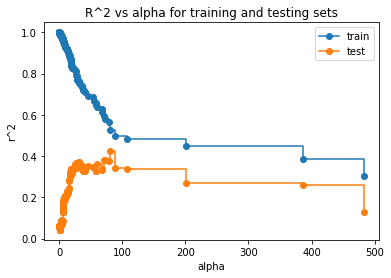

In [116]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()

ax.set_xlabel("alpha")
ax.set_ylabel("r^2")
ax.set_title("R^2 vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to r^2 of 1 on the training set and 0 testing. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=85 maximizes the testing r^2.

In [100]:
clf = tree.DecisionTreeRegressor(random_state=42, ccp_alpha=85)
clf.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=85, random_state=0)

In [103]:
clf.get_depth()

5

In [104]:
clf.get_n_leaves()

8

In [105]:
clf.get_params()

{'ccp_alpha': 85,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

[Text(372.0, 498.3, 'X[2] <= 0.005\nmse = 6076.398\nsamples = 353\nvalue = 153.737'),
 Text(186.0, 407.70000000000005, 'X[8] <= 0.006\nmse = 3612.73\nsamples = 209\nvalue = 118.043'),
 Text(93.0, 317.1, 'mse = 2378.339\nsamples = 152\nvalue = 100.559'),
 Text(279.0, 317.1, 'mse = 3915.52\nsamples = 57\nvalue = 164.667'),
 Text(558.0, 407.70000000000005, 'X[2] <= 0.073\nmse = 5119.262\nsamples = 144\nvalue = 205.542'),
 Text(465.0, 317.1, 'X[9] <= 0.034\nmse = 4557.346\nsamples = 118\nvalue = 191.102'),
 Text(279.0, 226.5, 'X[8] <= -0.038\nmse = 4005.619\nsamples = 85\nvalue = 175.8'),
 Text(186.0, 135.89999999999998, 'mse = 2490.65\nsamples = 10\nvalue = 123.5'),
 Text(372.0, 135.89999999999998, 'X[3] <= 0.051\nmse = 3794.282\nsamples = 75\nvalue = 182.773'),
 Text(279.0, 45.299999999999955, 'mse = 3586.841\nsamples = 58\nvalue = 171.672'),
 Text(465.0, 45.299999999999955, 'mse = 2647.17\nsamples = 17\nvalue = 220.647'),
 Text(651.0, 226.5, 'X[8] <= 0.0\nmse = 3821.947\nsamples = 33\nv

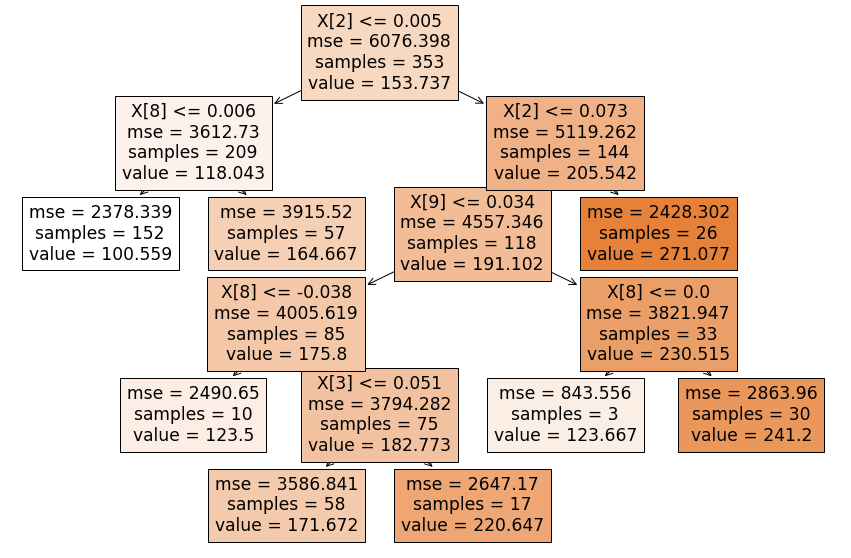

In [112]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True)

The new tree is pruned and it has a depth of 5 and the number of leaves equal to 8.

In [108]:
from sklearn.metrics import r2_score # r^2 is used 
r2_score_error = r2_score(y_test ,pred)
print('Coefficient of determination is' , r2_score_error)

Coefficient of determination is 0.4266461675782346


I am able to get a maximum r^2 score of 0.43 with the decision tree algorithim. 

Some other algorithim needs to be applied to this dataset to get a even better r^2.

CONCLUSIONS:

- Without any pruning we had a depth of 19 and the numbe of leaves equal to 346. 
The r^2 score was equal to 0.06. 

- Following Grid Search CV we had a r^2 of 0.26. 

- Finally using the cost compexity tree pruning technique we had a r^2 score of   0.43. This happened for a ccp alpha of 85.

Hence at least this dataset cost complexity pruning is the best technique for pruning the tree.


Resources
1. https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py

2. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.get_n_leaves